# Data Augmentation in Hand Digits

## We load libs

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from keras_preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

%matplotlib inline

## We load ours images

In [2]:
x_full = np.load('X.npy')
y_full = np.load('Y.npy')

## We show the first nine images 

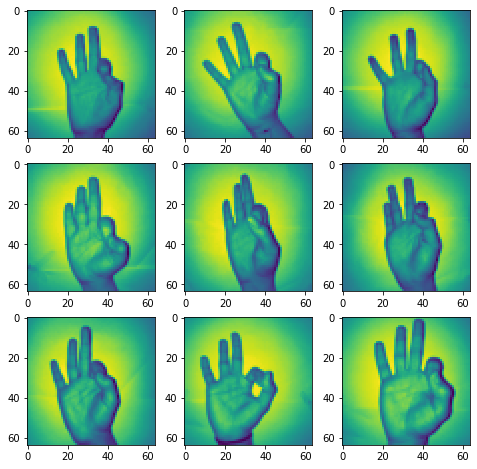

In [3]:
i = 0
fig=plt.figure(figsize=(8, 8))
j = i + 1
for i in range(1, 10):
    img = x_full[i]
    fig.add_subplot(3, 3, i)
    plt.imshow(img)
plt.show()

## We initialize the ImageDataGenerator
* rotation range (rotation)
* width shift range (décalage de largeur))
* height shift range (décalage en hauteur)
* shear range (cisaillement)
* zoom range (zoom)
* horizontal flip (retournement horizontal)
        

In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



## We select the images and reshape the array numpy

In [5]:
# np.random.choice
x = x_full[:9]  # this is a Numpy array with shape (9, 64, 64)
x = np.reshape(x, (x.shape[0],x.shape[1],x.shape[2], 1))  # this is a Numpy array with shape (9, 64, 64, 1)
print(x.shape)

(9, 64, 64, 1)


## We transform and show the images 
* Initialize the matplotlib figure 
* We We loop on a batch to transform the images :
   * We select the dataset, we choose : the batch size, the prefix, the format
   * we reshape the numpy array 
   * We select the image and the plot
   * we print the batch shape
   * We create an if for break the code otherwise the generator would loop indefinitely
* We plot the show outside the loop
   


(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


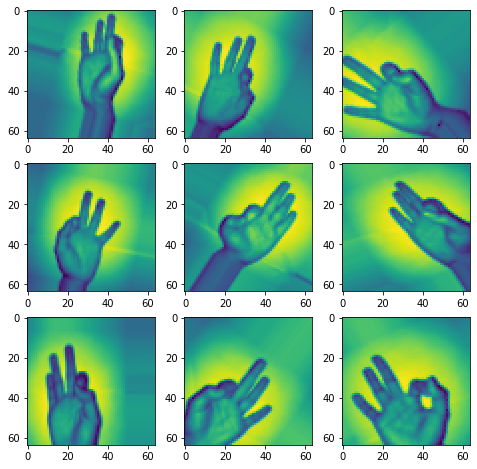

In [7]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
fig=plt.figure(figsize=(8, 8))
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='images', save_prefix='digit', save_format='jpeg', shuffle=False):
    
    batch = np.reshape(batch, (batch.shape[1],batch.shape[2]))
    
    j= i+1
    fig.add_subplot(3, 3, j)
    plt.imshow(batch)
    print(batch.shape)
    i += 1
    if i > 8:
        
        
        
        break  # otherwise the generator would loop indefinitely
        
plt.show()